# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

!Image "/Users/jaikumar/Desktop/Berkeley_ML/try-it_2.1_starter/images/baseballs.png"


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rc('figure',figsize=(17,13))

# for some good plots
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import seaborn as sns
sns.set_style('darkgrid')

sns.set_context('paper',font_scale=2)

In [18]:
#read in the data
baseball_salaries = pd.read_csv('/Users/jaikumar/Desktop/Berkeley_ML/try-it_2.1_starter/data/baseball.csv', index_col=0)

In [3]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         797 non-null    object
 1   leagueID     797 non-null    object
 2   player       797 non-null    object
 3   salary       797 non-null    int64 
 4   position     797 non-null    object
 5   gamesplayed  797 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 43.6+ KB


In [19]:
#First few rows
baseball_salaries.head()



,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6200000,CF,112
2,ANA,AL,colonba0,11000000,P,3
3,ANA,AL,davanje0,375000,CF,108
4,ANA,AL,donnebr0,375000,P,5
5,ANA,AL,eckstda0,2150000,SS,142


In [14]:
baseball_salaries.describe()

,salary,gamesplayed
count,7.970000e+02,797.000000
mean,2.497669e+06,63.705144
std,3.535925e+06,53.621952
min,3.000000e+05,1.000000
25%,3.350000e+05,14.000000
50%,8.000000e+05,49.000000
75%,3.000000e+06,112.000000
max,2.250000e+07,162.000000


### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

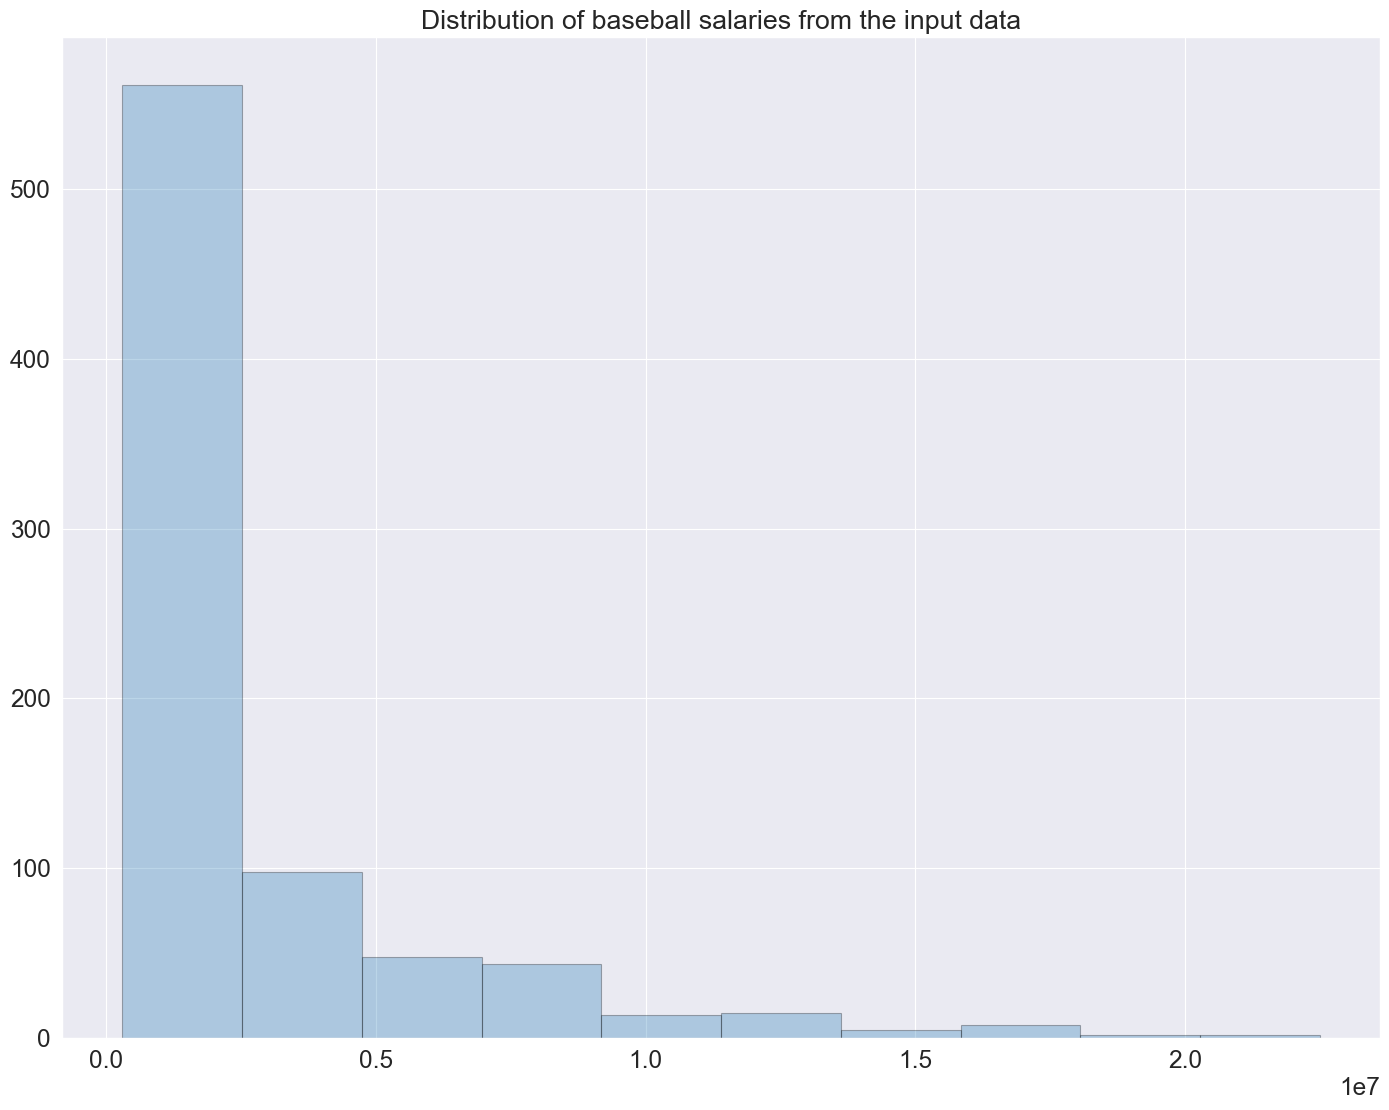

In [63]:
plt.hist(baseball_salaries['salary'], edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of baseball salaries from the input data');

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   salary  797 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB
       salary
1     6200000
2    11000000
3      375000
4      375000
5     2150000
..        ...
793    300000
794   1600000
795    340000
796    870000
797    775000

[797 rows x 1 columns]


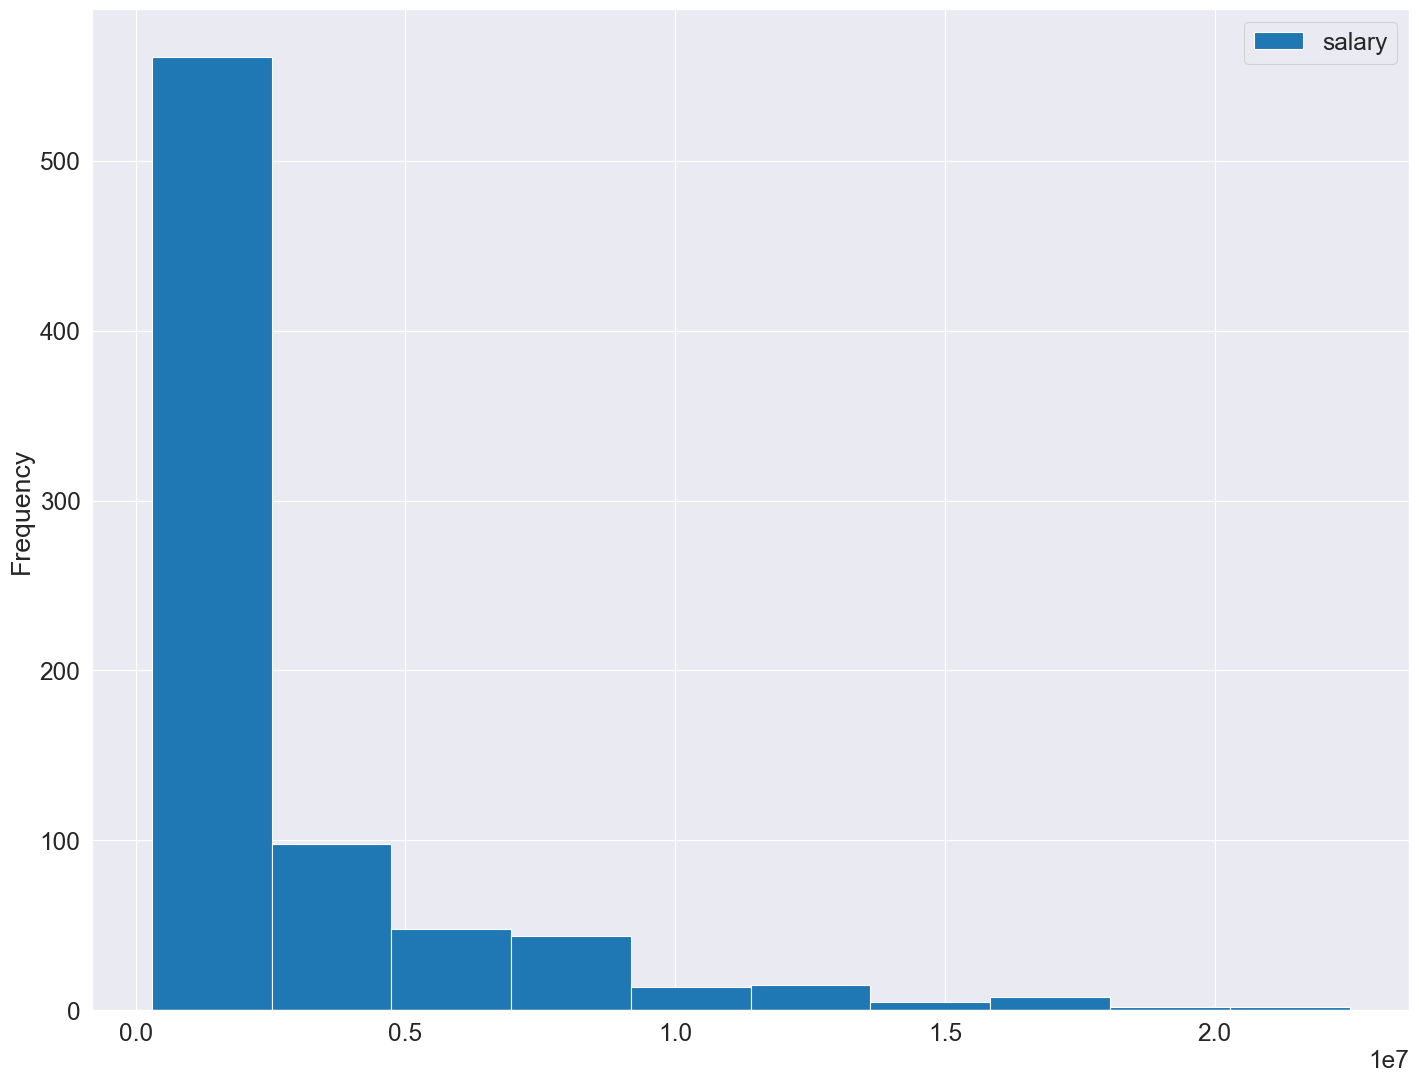

In [69]:
#histogram of the salaries

BBH = baseball_salaries.filter(items=['salary'])
BBH.info()
print (BBH)
baseball_hist = BBH.plot(kind='hist')



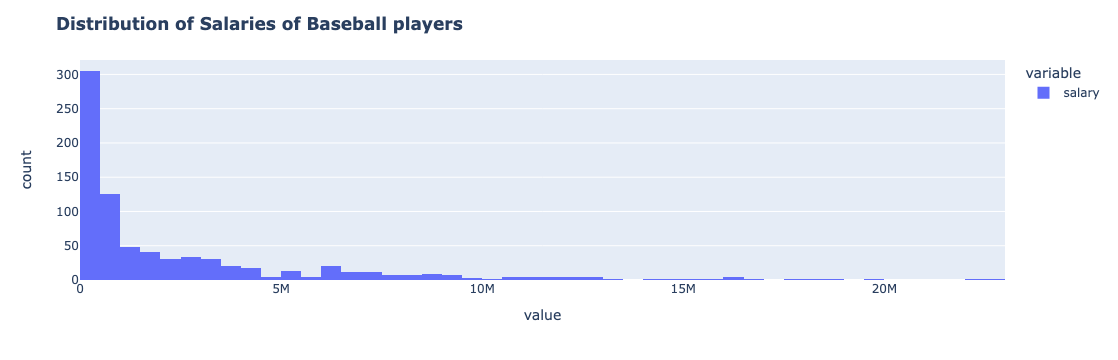

In [70]:
fig = ex.histogram(BBH)
fig.update_layout(title='<b>Distribution of Salaries of Baseball players<b>')
fig.show()

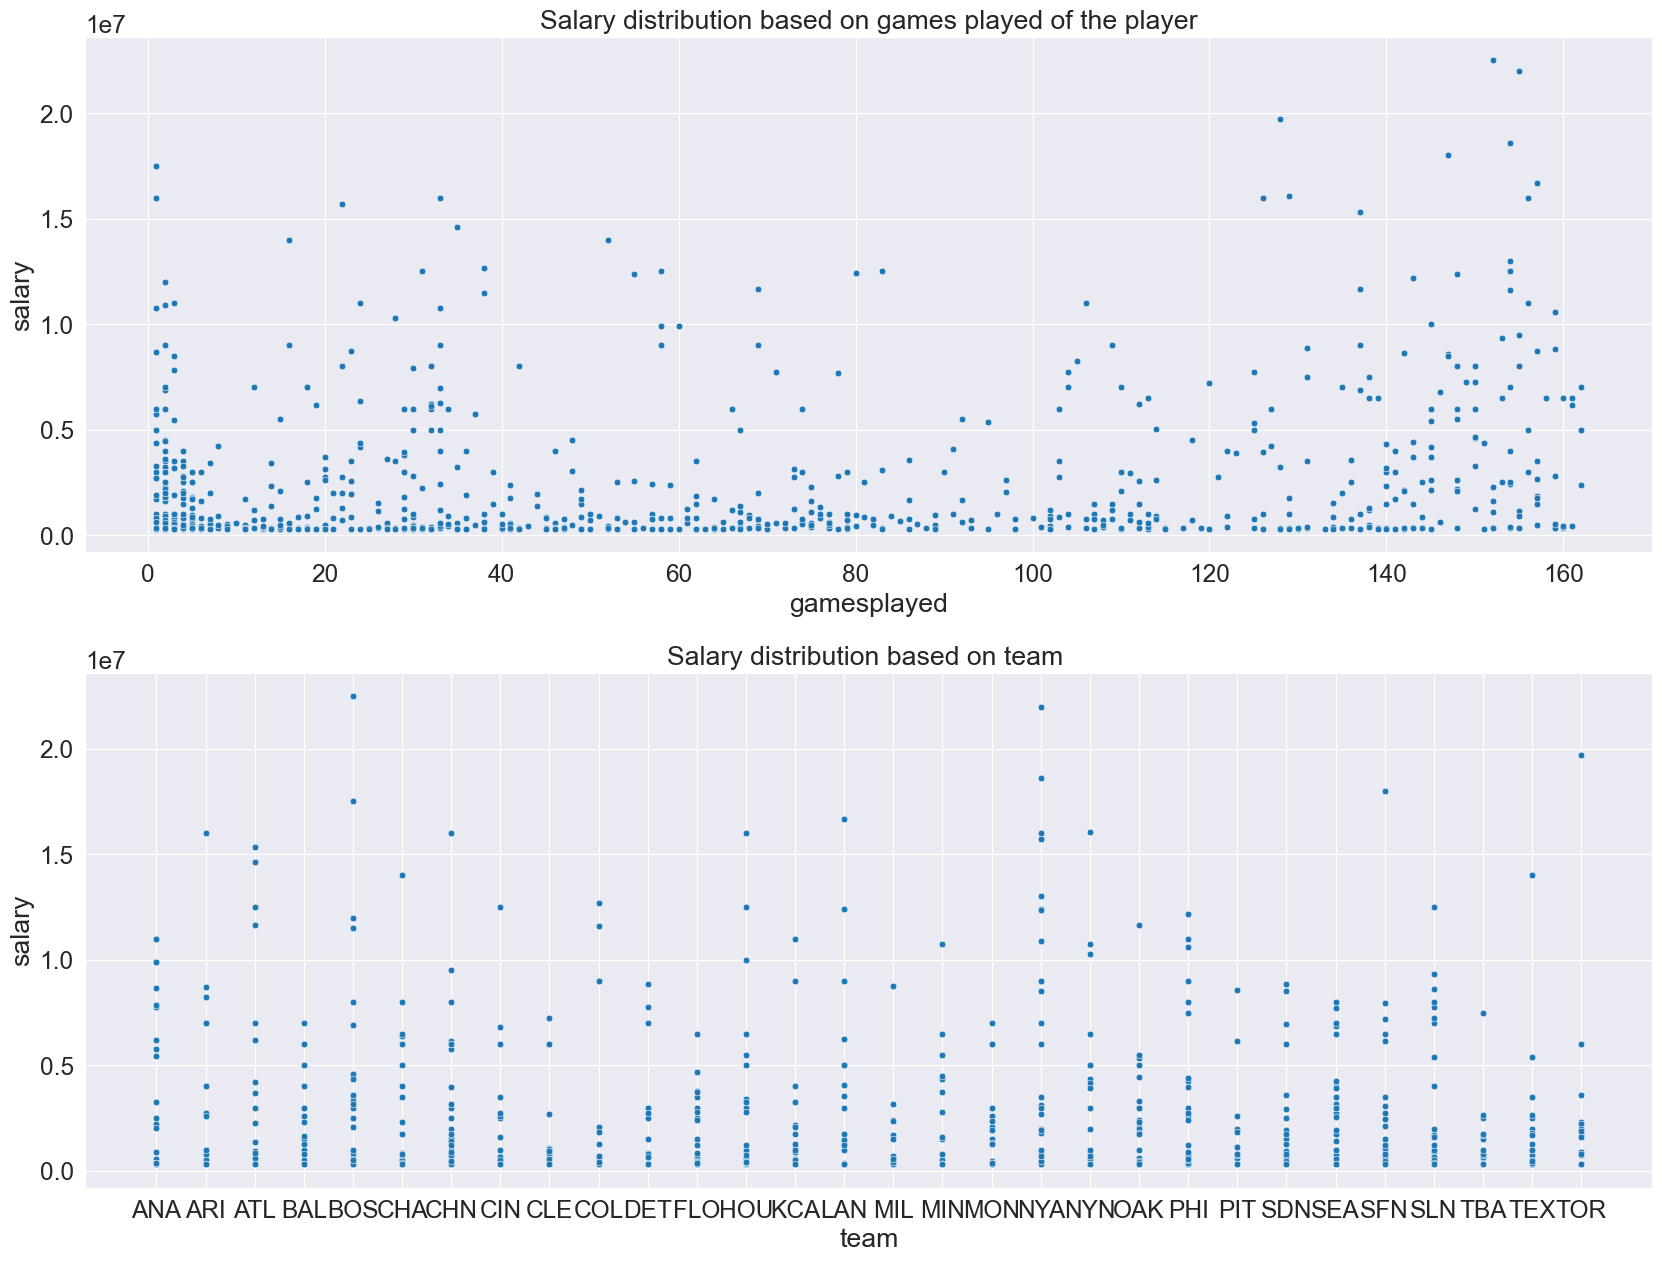

In [29]:
plt.subplot(2,1,1)
plt.title('Salary distribution based on games played of the player')
sns.scatterplot(x=baseball_salaries['gamesplayed'],y=baseball_salaries['salary'])
plt.subplot(2,1,2)
plt.title('Salary distribution based on team ')
sns.scatterplot(x=baseball_salaries['team'],y=baseball_salaries['salary'])
plt.tight_layout()
plt.show()

### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [38]:
baseball_salaries['salary'].sample(5)

545      550000
340      360000
109      490000
151      850000
41     16000000
Name: salary, dtype: int64

### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

In [48]:
#empty list for sample means
sample_means_5 = []
for i in range(1000):
    sample = baseball_salaries['salary'].sample(5)
    sample_mean = np.mean(sample)
    sample_means_5.append(sample_mean)
print (sample_means_5)
SSM = np.mean(sample_means_5)
SSD = np.std(sample_means_5)
print (SSM, SSD)

[3079346.6, 2921000.0, 1830000.0, 382600.0, 849400.0, 2491666.6, 6694714.2, 4750000.0, 2753000.0, 5819833.4, 5753500.0, 3494480.0, 1429000.0, 5754480.0, 3325000.0, 2966700.0, 1557000.0, 2028333.4, 4585333.4, 5121828.6, 640000.0, 3058540.0, 2601000.0, 966000.0, 2699666.6, 1497333.4, 2947500.0, 2950000.0, 2422666.6, 3126000.0, 2698000.0, 751000.0, 1982500.0, 1619000.0, 3655000.0, 1280000.0, 2399800.0, 521200.0, 1083000.0, 1028000.0, 528040.0, 4330480.0, 1971000.0, 2483880.0, 1050000.0, 1645500.0, 7560000.0, 3237000.0, 1047000.0, 431500.0, 2920500.0, 934000.0, 2140700.0, 2355000.0, 1896333.4, 2493500.0, 3045000.0, 476666.6, 1929000.0, 1871666.6, 481900.0, 1127600.0, 1539590.0, 2780200.0, 1075000.0, 870500.0, 2053000.0, 3606500.0, 2014600.0, 3756666.6, 2470600.0, 1039400.0, 604000.0, 2178000.0, 4906666.8, 3430000.0, 485250.0, 2055000.0, 2120500.0, 2865133.4, 2925000.0, 3994733.4, 1425200.0, 4890000.0, 5110360.0, 2292100.0, 5139677.2, 1654260.0, 2865000.0, 3020400.0, 1467500.0, 1476500.0, 2

In [50]:
#empty list for sample means
sample_means_10 = []
for i in range(1000):
    sample = baseball_salaries['salary'].sample(10)
    sample_mean = np.mean(sample)
    sample_means_10.append(sample_mean)
print (sample_means_10)
SSM = np.mean(sample_means_10)
SSD = np.std(sample_means_10)
print (SSM, SSD)

[2514392.9, 7632100.0, 2752610.0, 3957880.8, 1748690.0, 1663060.0, 4444050.0, 3427200.0, 2404150.0, 2375200.0, 3609000.0, 1894700.0, 3514716.7, 2338320.0, 3980000.0, 4935666.7, 4139916.7, 926375.0, 1120166.7, 3903100.0, 2012050.0, 546700.0, 5088600.0, 3332940.0, 621750.0, 2600650.0, 3935975.0, 3064687.5, 2045605.0, 2850800.0, 2975700.0, 2871189.3, 1832450.0, 1629150.0, 2611725.0, 3363833.3, 1716723.3, 3477333.4, 2628033.3, 4894583.3, 1992540.0, 1962083.3, 4044333.3, 1480750.0, 1766233.3, 4980750.0, 6244142.9, 3444683.3, 2806300.0, 3843950.0, 1107537.5, 4658526.7, 4182421.7, 727200.0, 425500.0, 587300.0, 3329550.0, 3131260.8, 1632500.0, 4863250.0, 1473100.0, 4603000.0, 1382640.0, 1983250.0, 461100.0, 2148800.0, 2152750.0, 5032350.0, 1700250.0, 2321500.0, 1870833.4, 1944950.0, 4698804.2, 2076950.0, 726000.0, 2636600.0, 3372500.0, 3560400.0, 3186000.0, 1481133.3, 2823083.3, 1552000.0, 2509750.0, 2078740.0, 2732000.0, 2911000.0, 1051900.0, 2643600.0, 6460428.6, 1729616.7, 4881604.2, 679425

In [52]:
#empty list for sample means
sample_means_25 = []
for i in range(1000):
    sample = baseball_salaries['salary'].sample(25)
    sample_mean = np.mean(sample)
    sample_means_25.append(sample_mean)
print (sample_means_25)
SSM = np.mean(sample_means_25)
SSD = np.std(sample_means_25)
print (SSM, SSD)

[3355686.68, 2109293.32, 1945061.32, 2452462.84, 3018310.6, 1823240.0, 2673586.68, 3347190.48, 1549649.32, 2253486.68, 4827185.72, 2918594.68, 2525511.44, 2666740.0, 1911360.0, 2126860.0, 1342017.68, 2045440.0, 1910576.0, 2441440.0, 1890100.0, 2903360.04, 2365347.32, 1540860.0, 1358076.0, 2412708.0, 1833826.68, 1001040.0, 2099800.0, 1770856.0, 3102066.68, 2365024.0, 1804340.0, 3130893.32, 1658249.32, 1953892.0, 2659156.0, 3052586.68, 3677650.68, 1880500.0, 2136681.32, 3407266.68, 3234904.0, 2863813.36, 1259356.0, 1765576.0, 1740688.68, 1567988.68, 3516643.32, 1992060.0, 2771579.44, 2981260.0, 3335240.0, 1768566.64, 2911166.0, 1677620.0, 3045610.84, 3151757.16, 2501737.64, 3086416.68, 2573693.32, 2070084.0, 2147646.68, 2748049.32, 2273612.0, 2910388.68, 1769220.0, 1381226.68, 2247961.16, 3384642.88, 2245890.52, 2421578.0, 2342420.0, 1986296.0, 2560049.32, 2632286.68, 2934720.0, 1295400.0, 2063586.68, 2266060.0, 3215142.84, 1555976.0, 1457740.0, 4224389.72, 1885535.0, 2292721.48, 2171826

In [53]:
#empty list for sample means
sample_means_50 = []
for i in range(1000):
    sample = baseball_salaries['salary'].sample(50)
    sample_mean = np.mean(sample)
    sample_means_50.append(sample_mean)
print (sample_means_50)
SSM = np.mean(sample_means_50)
SSD = np.std(sample_means_50)
print (SSM, SSD)

[2209880.0, 1927453.42, 3794729.16, 2725664.5, 2380713.32, 2227059.34, 2142561.66, 2489488.82, 2436383.34, 3118472.0, 2497836.68, 2511394.0, 2274697.0, 2515410.82, 2991134.76, 1796214.66, 3027939.92, 2290407.32, 2981450.1, 2477174.68, 2367185.92, 3132998.68, 2669370.02, 2793822.14, 2221388.58, 2083813.0, 2766860.34, 1991280.0, 2376791.34, 1943646.66, 2837339.0, 2054698.34, 2319474.34, 2455993.0, 1888380.66, 2447490.68, 2084796.66, 3223758.02, 2028689.0, 1955449.0, 2130090.68, 3273075.26, 2824064.34, 2245751.34, 2725273.34, 3529428.58, 2276717.18, 3346935.42, 2523331.16, 2406985.34, 2127326.2, 1823492.66, 3427700.16, 2509242.16, 3338097.24, 3093763.32, 1596224.68, 3251128.0, 1998461.02, 2746018.66, 1962610.18, 2158791.0, 3297213.34, 2895328.08, 2269593.34, 2221132.68, 2171800.0, 2195360.16, 2764043.0, 2870801.34, 2349700.0, 2399846.66, 2807277.24, 2263696.34, 2403058.0, 2109734.66, 2029370.66, 2434026.0, 2050825.34, 2908960.0, 2492081.44, 2551941.36, 2141844.66, 2695713.26, 1985783.32, 

In [54]:
#empty list for sample means
sample_means_100 = []
for i in range(1000):
    sample = baseball_salaries['salary'].sample(100)
    sample_mean = np.mean(sample)
    sample_means_100.append(sample_mean)
print (sample_means_100)
SSM = np.mean(sample_means_100)
SSD = np.std(sample_means_100)
print (SSM, SSD)

[2189377.67, 2309161.55, 2071012.83, 2091470.0, 2727236.29, 2132370.67, 2195043.55, 2580102.75, 2270889.72, 2384410.62, 2577778.53, 2463849.88, 2504115.56, 2452119.85, 2239667.1, 2640806.71, 2346148.08, 2116592.0, 2626014.19, 1922323.77, 2618619.11, 2426897.83, 3145458.71, 2329211.67, 2591544.74, 2340375.68, 2773820.01, 1947534.0, 2536961.66, 2900666.67, 2647495.33, 2446717.96, 2074707.83, 2172481.1, 2900162.5, 1962646.03, 2726537.3, 2618031.59, 2687960.03, 2227245.63, 2139146.08, 2475689.27, 2972107.7, 2168870.34, 2439831.57, 2288459.04, 2673773.59, 2414240.34, 2013049.46, 3056039.53, 2376437.0, 2662028.83, 3557975.53, 2313852.05, 2437857.59, 2421633.83, 2276092.97, 2829363.0, 2489412.84, 3381064.35, 2335968.33, 2792672.76, 2381466.28, 3225560.89, 2472710.21, 1934805.0, 2830568.34, 2157102.74, 2843352.71, 2322572.75, 2698781.95, 2252847.04, 2635377.46, 2322834.28, 2590991.0, 2948420.98, 2539131.3, 2217726.5, 2579908.28, 2501440.04, 1951085.27, 2828008.4, 2557292.06, 2353433.34, 261971

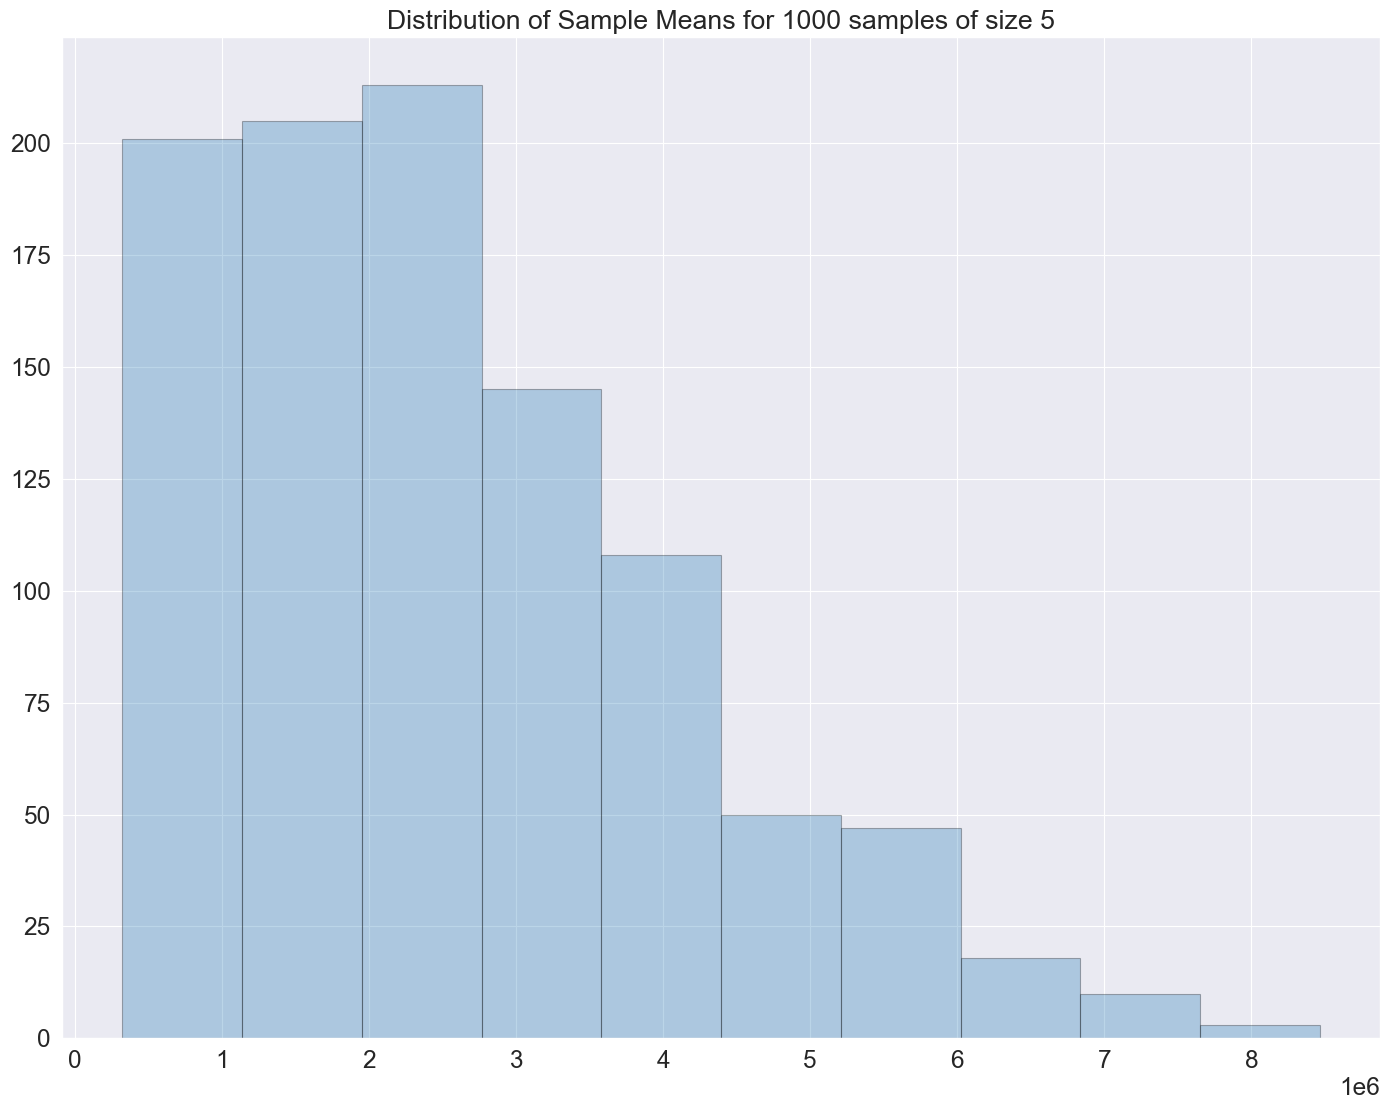

In [71]:
#histogram of sample means
plt.hist(sample_means_5, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means for 1000 samples of size 5');


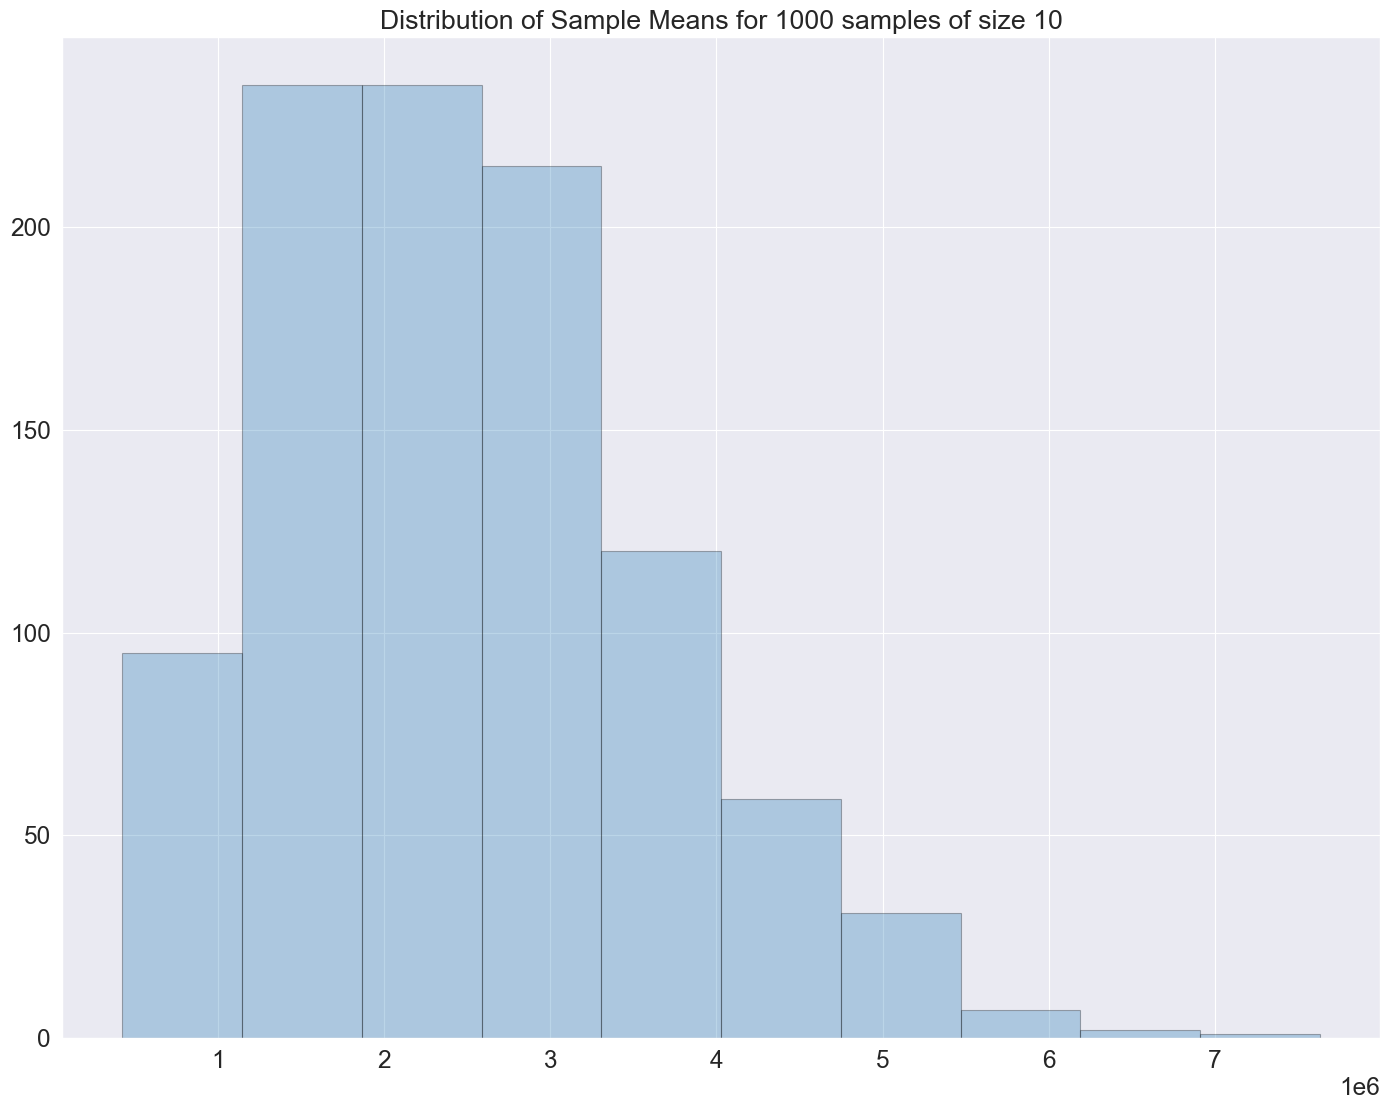

In [51]:
#histogram of sample means
plt.hist(sample_means_10, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means for 1000 samples of size 10');

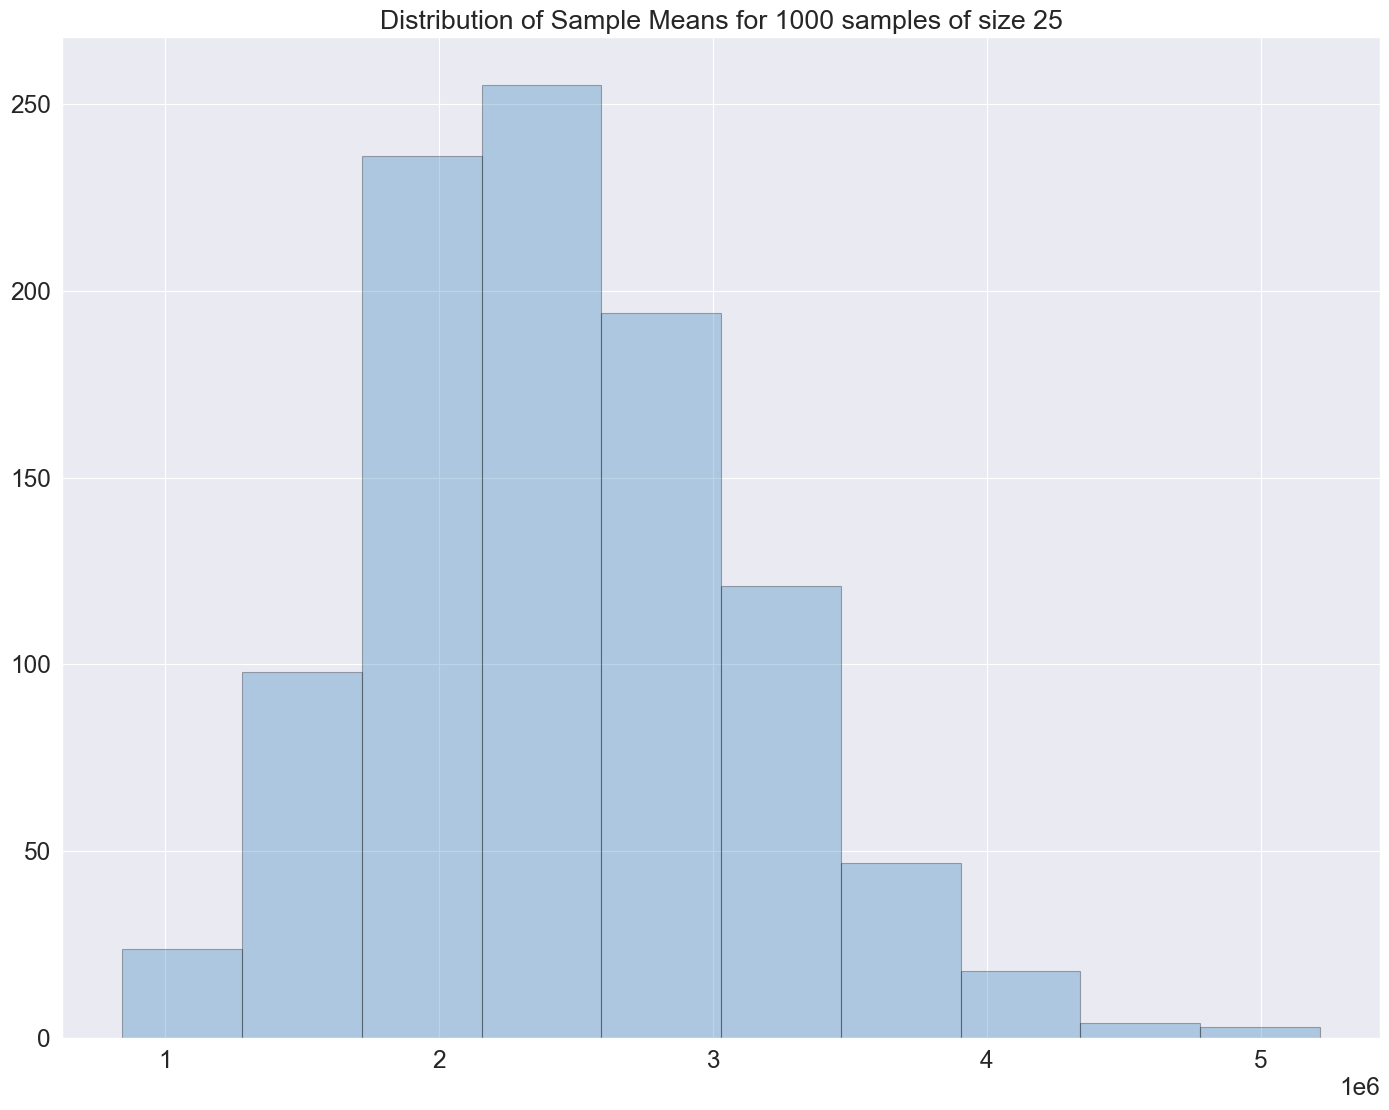

In [55]:
#histogram of sample means
plt.hist(sample_means_25, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means for 1000 samples of size 25');

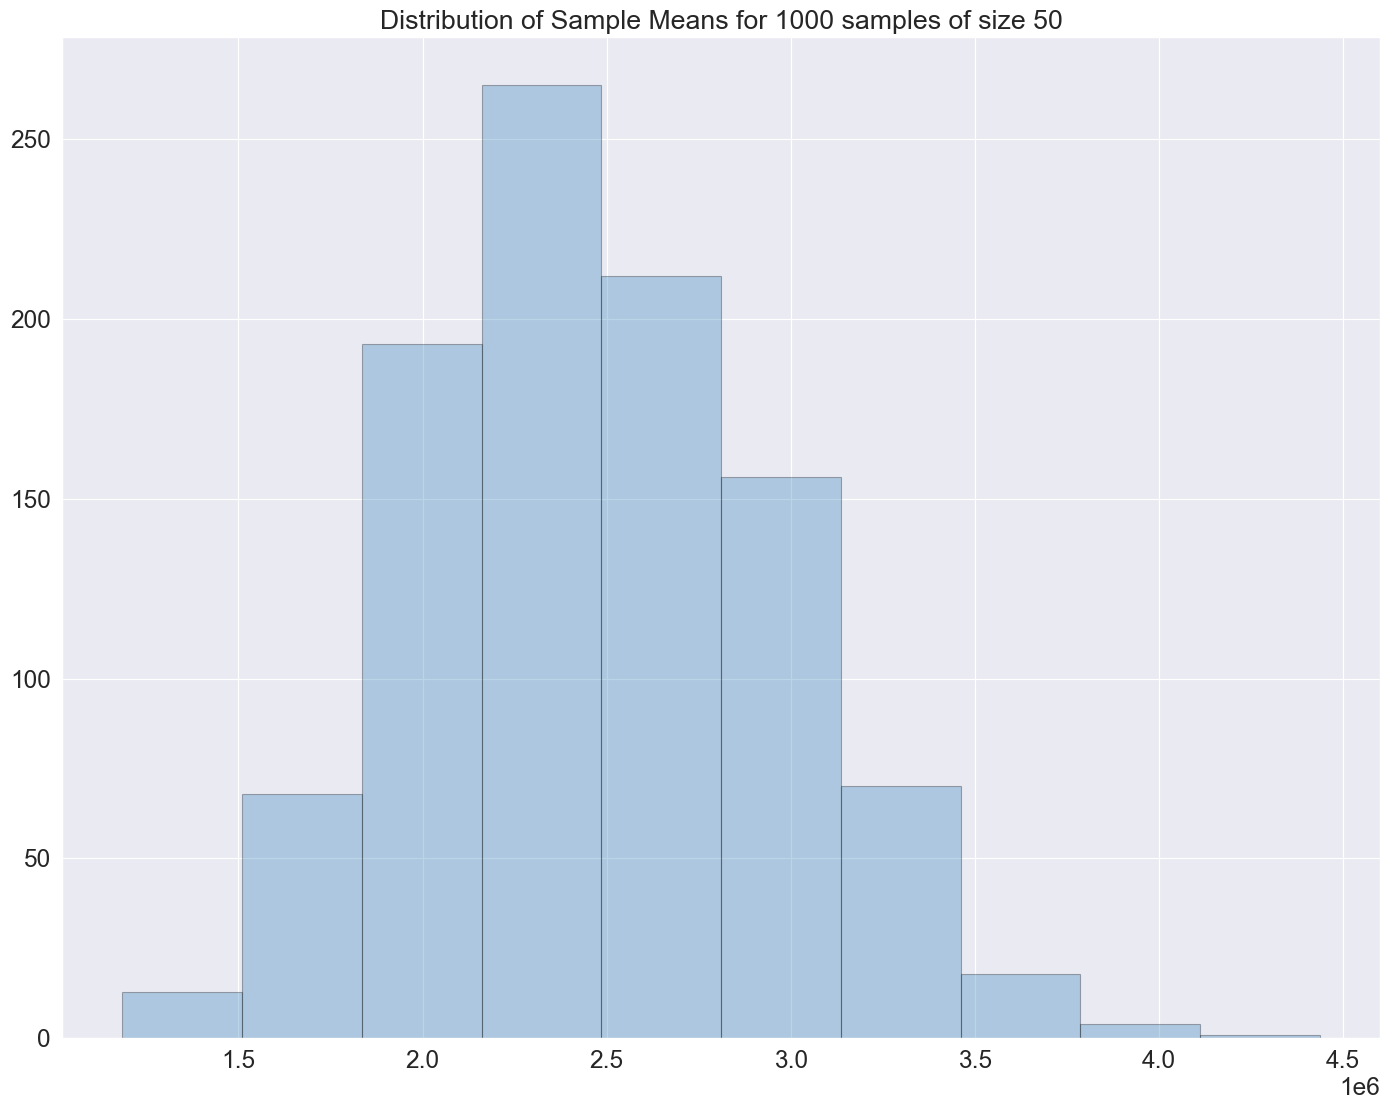

In [56]:
#histogram of sample means
plt.hist(sample_means_50, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means for 1000 samples of size 50');

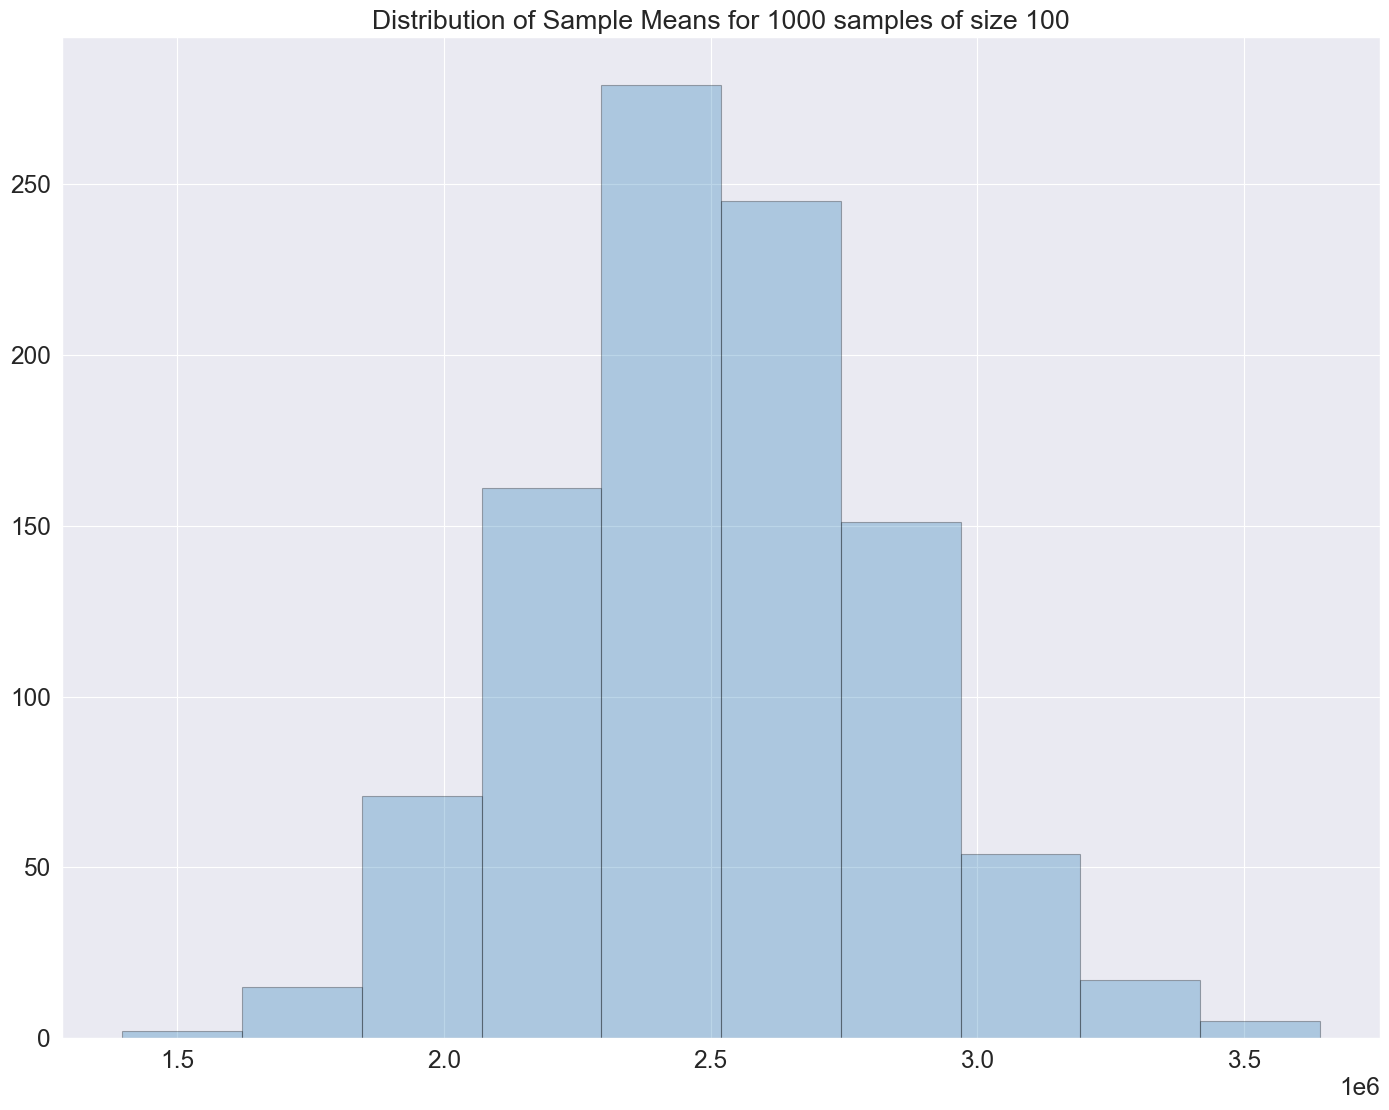

In [57]:
#histogram of sample means
plt.hist(sample_means_100, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means for 1000 samples of size 100');

Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.